# k Nearest Neighbors
## Classification
Реализуйте алгоритм к ближайших соседей. 
Создадим искуственный набор данных из 100 наблюдений с 3 классами.
Необходимо реализовать функцию на входе которой:
- тренировочный набор данных (признаки и метки классов);
- тестовый набор данных (признаки);
- $k$ - количество ближайших соседей.

На выходе функция должна возвращать метки тестового набора данных. 
В качестве расстояния между объектами следует использовать Эвклидову меру.

**Алгоритм к ближайших соседей:**

Для каждого объекта тестового набора данных:
1. вычисление расстояний между всеми объектами тренировочного набора;
2. определение $k$ наименьших расстояний;
3. определение классов для $k$ найденных объектов;
4. присваивание метки тестовому объекту класса, который превалирует среди найденных объектов.

В многоклассовой модели может возникнуть неопределенность, что в 3 найденных объектак будут присутсвовать разные классы. В этом случае необходимо присваивать класс случайным образом.

In [19]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [20]:
X, Y = make_blobs(n_samples = 100, n_features=2, centers=3, cluster_std = 2, random_state=17)

Text(0.5, 1.0, 'Initial data')

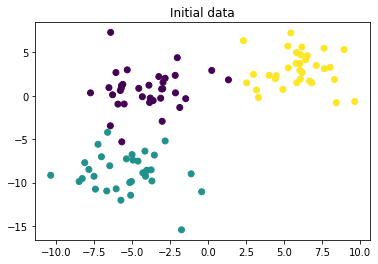

In [21]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('Initial data')

In [22]:
import random
import numpy as np
from collections import Counter

In [23]:
def distance(a, b):
    return ((a[0] - b[0])**2 + (a[1] - b[1])**2)**(0.5)

In [24]:
def funct_kNN(x_train, y_train, x_test, k): #x_test = y_test
    y_test = []
    for testP in x_test:
        dist = []
        for i in range(len(x_train)):
            dist.append((distance(testP, x_train[i]), y_train[i]))
        
        
        dist.sort()
#         print(dist)
        k_dist = dist[0:k]
 
        k_classes = []
        for i in k_dist: k_classes.append(i[1])

        common_classes = Counter(k_classes).most_common()

        if len(common_classes) == 1:
            common_classes.append(('', ''))
            common_classes.append(('', ''))

        if (k == 3 or k == 9) and common_classes[0][1] == common_classes[1][1] == common_classes[2][1]:
            y_test.append(common_classes[np.random.randint(3)][0])    
        elif k > 3 and common_classes[0][1] == common_classes[1][1]:
            y_test.append(common_classes[np.random.randint(2)][0])
        else:
            y_test.append(common_classes[0][0])
        
        #y_test.append(common_classes[0][0])

    return y_test 

In [25]:
#funct_kNN(X[0:25], Y[0:25], X[25:100], 3)

Для корректного анализа построенного классификатора, разбейте исходный набор данных на тренировочный и тестовый.
Проверьте качество классификации для различных параметров $k$ (1, 3, 5, 7, 9) метрикой точность (Accuracy). Точность это отношение количества правильно классифицированных объектов ко всему количеству объектов.

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [27]:
x_tr, x_te, y_tr, y_te = train_test_split(X, Y, train_size = 0.5)

for k in [1, 3, 5, 7, 9]:
    y_pred = funct_kNN(x_tr, y_tr, x_te, k)
    print('k = ' + str(k) + ' accuracy score = ' + str(accuracy_score(y_te, y_pred)))

k = 1 accuracy score = 0.96
k = 3 accuracy score = 0.96
k = 5 accuracy score = 0.96
k = 7 accuracy score = 0.96
k = 9 accuracy score = 0.98


Постройте разделающие поверхности, которые строит классификатор

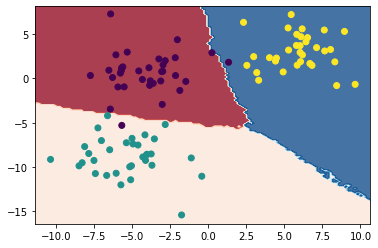

In [30]:
h = 0.2
x_min, x_max = np.min(X[:,0]) - 1, np.max(X[:,0]) + 1
y_min, y_max = np.min(X[:,1]) - 1, np.max(X[:,1]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

Z = funct_kNN(X, Y, np.vstack((xx.ravel(), yy.ravel())).transpose(), 51)
Z = np.array(Z).reshape(xx.shape)
plt.contourf(xx, yy, Z,  cmap=plt.cm.RdBu, alpha=.8)
plt.scatter(X[:,0], X[:,1], c = Y)
plt.show()

## Regression
Напишите функцию для регрессии методом к ближайших соседей.

Для проверки вашего регрессионной модели создайте функцию синуса в диапазоне [0, 5] и возьмите в этом диапазоне 10 случайных точек как тренеровочную выборку. 
Задача: предсказать функцию на всем диапазоне [0, 5] для всех возможных значений параметра $k$.

$y = sin(x)$

**Алгоритм регрессии:**

Для каждого тестового обекта:
1. вычисление расстояний между всеми тренировочными объектами (можно использовать просто разницу по модулю между признаками объектов, так как у нас всего один признак в задаче);
2. нахождение $k$ объектов с минимальными расстояниями;
3. вычисление среднего значения по к найденным объектам и присваивание этого значения тестовому объекту.

In [11]:
def funct_kNN_reg(x_train, y_train, x_test, k):
    y_reg_test = []
    
    for testP in x_test:
        dist = []
        for i in range(len(x_train)):
            dist.append(((abs(testP-x_train[i])), y_train[i]))

        dist.sort()
        k_dist = dist[0:k]
        
        k_classes = []
        for tmp in k_dist: k_classes.append(tmp[1])
        y_reg_test.append(np.mean(k_classes))
        
    return y_reg_test

In [13]:
from math import sin
from sklearn.metrics import mean_absolute_error

X = np.linspace(0.0, 5.0, num = 1000)
Y = []
for i in X: Y.append(sin(i))

x_tr, x_te, y_tr, y_te = train_test_split(X, Y, train_size=0.01)

for k in [1, 3, 5, 7, 9]:
    y_reg = funct_kNN_reg(x_tr, y_tr, x_te, k)
    print('k = ' + str(k) + ' mean error = ' + str(mean_absolute_error(y_te, y_reg)))

k = 1 mean error = 0.09718527412222086
k = 3 mean error = 0.18228166799994336
k = 5 mean error = 0.34940016530822576
k = 7 mean error = 0.510399946156319
k = 9 mean error = 0.5695552718607835


Постройте на одном графике исходную функцию, тренировочные объекты и предсказанные функции для каждого значения $k$.

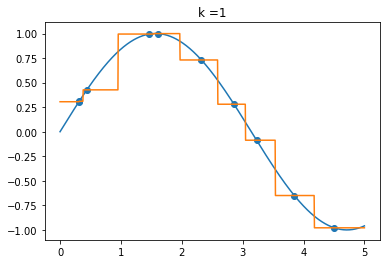

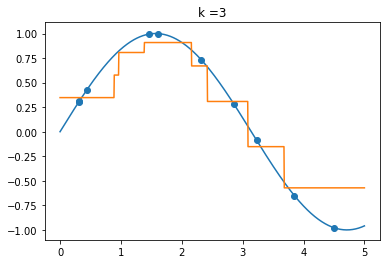

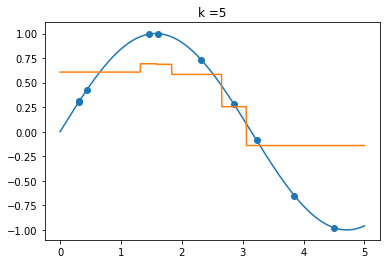

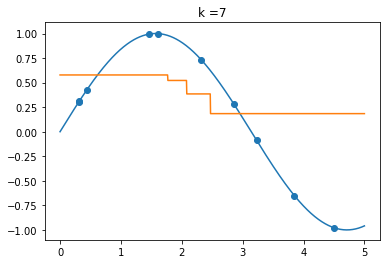

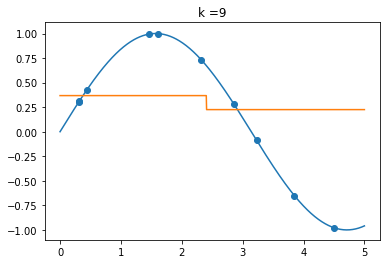

In [14]:
for k in [1, 3, 5, 7, 9]:
    y_reg = funct_kNN_reg(x_tr, y_tr, X, k)
    plt.scatter(x_tr, y_tr)
    plt.plot(X, Y)
    plt.plot(X, y_reg)
    plt.title('k =' + str(k))
    plt.show()